In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold


from sklearn.metrics import mutual_info_score

%matplotlib inline

In [2]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Data Preparation

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
tc = pd.to_numeric(df.totalcharges, errors="coerce")

In [7]:
df[tc.isnull()][["customerid", "totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [8]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce").fillna(0)

In [9]:
df[tc.isnull()][["customerid", "totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [10]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [11]:
df.churn = (df.churn == "yes").astype(int)

In [12]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

### Setting up validation framework

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=142)

len(df_full_train), len(df_test)

(5634, 1409)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=142)

len(df_train), len(df_val)

(4225, 1409)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [17]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

### EDA

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df.churn.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

In [21]:
global_churn_rate = round(df_full_train.churn.mean(), 2)
global_churn_rate

0.26

In [22]:
numerical = ["tenure", "monthlycharges", "totalcharges"]
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',  'multiplelines', 
                'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 
                'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [23]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance: Chgurn Rate & Risk Ratio

In [24]:
df_full_train[df_full_train.gender == "female"].churn.mean()/global_churn_rate

1.0096673222348411

In [25]:
df_full_train[df_full_train.gender == "male"].churn.mean()/global_churn_rate

1.023128079480897

In [26]:
df_full_train[df_full_train.partner == "yes"].churn.mean()/global_churn_rate

0.7440054418683748

In [27]:
df_full_train[df_full_train.partner == "no"].churn.mean()/global_churn_rate

1.2697576396206531

In [28]:
df_full_train[df_full_train.dependents == "yes"].churn.mean()/global_churn_rate

0.576575742138656

In [29]:
df_full_train[df_full_train.dependents == "no"].churn.mean()/global_churn_rate

1.2004104629324865

In [30]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(["mean", "count"])
    df_group["mean"] = round(df_group["mean"], 2)
    df_group["diff"] = round(df_group["mean"] - global_churn_rate, 2)
    df_group["risk"] = round(df_group["mean"] / global_churn_rate, 2)
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.26,2777,0.00,1.00
male,0.27,2857,0.01,1.04




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.23,4726,-0.03,0.88
1,0.42,908,0.16,1.62




partner


,mean,count,diff,risk
partner,,,,
no,0.33,2920,0.07,1.27
yes,0.19,2714,-0.07,0.73




dependents


,mean,count,diff,risk
dependents,,,,
no,0.31,3973,0.05,1.19
yes,0.15,1661,-0.11,0.58




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.25,541,-0.01,0.96
yes,0.27,5093,0.01,1.04




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.25,2714,-0.01,0.96
no_phone_service,0.25,541,-0.01,0.96
yes,0.28,2379,0.02,1.08




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.19,1912,-0.07,0.73
fiber_optic,0.42,2490,0.16,1.62
no,0.08,1232,-0.18,0.31




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.42,2798,0.16,1.62
no_internet_service,0.08,1232,-0.18,0.31
yes,0.13,1604,-0.13,0.50




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.40,2474,0.14,1.54
no_internet_service,0.08,1232,-0.18,0.31
yes,0.22,1928,-0.04,0.85




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.39,2477,0.13,1.50
no_internet_service,0.08,1232,-0.18,0.31
yes,0.22,1925,-0.04,0.85




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.41,2798,0.15,1.58
no_internet_service,0.08,1232,-0.18,0.31
yes,0.15,1604,-0.11,0.58




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.33,2242,0.07,1.27
no_internet_service,0.08,1232,-0.18,0.31
yes,0.30,2160,0.04,1.15




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.33,2226,0.07,1.27
no_internet_service,0.08,1232,-0.18,0.31
yes,0.30,2176,0.04,1.15




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.43,3120,0.17,1.65
one_year,0.11,1184,-0.15,0.42
two_year,0.02,1330,-0.24,0.08




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16,2297,-0.10,0.62
yes,0.33,3337,0.07,1.27




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.16,1249,-0.10,0.62
credit_card_(automatic),0.15,1211,-0.11,0.58
electronic_check,0.45,1875,0.19,1.73
mailed_check,0.20,1299,-0.06,0.77


### Feature Importance: Mutual Information

In [31]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.10069113679294704

In [32]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

7.873040017092325e-06

In [33]:
mutual_info_score(df_full_train.churn, df_full_train.totalcharges)

c:\Users\soumy\anaconda3\envs\mlops\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.5425289427149174

In [34]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.012153344490082568

In [35]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.100691
onlinesecurity      0.068576
techsupport         0.062718
internetservice     0.054185
onlinebackup        0.044742
paymentmethod       0.044284
deviceprotection    0.043403
streamingmovies     0.030532
streamingtv         0.030474
paperlessbilling    0.019181
dependents          0.015158
partner             0.012153
seniorcitizen       0.010899
multiplelines       0.000775
phoneservice        0.000034
gender              0.000008
dtype: float64

### Feature Importance: Correlation

In [36]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.356726
monthlycharges    0.188541
totalcharges     -0.203819
dtype: float64

In [37]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5830945558739254

In [38]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure < 12)].churn.mean()

0.41133263378803775

In [39]:
df_full_train[df_full_train.tenure >= 12].churn.mean()

0.1732362540798393

In [40]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.356726
monthlycharges    0.188541
totalcharges      0.203819
dtype: float64

### One Hot Encoding

In [41]:
train_dict  = df_train[categorical + numerical].to_dict(orient="records")
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 61,
 'monthlycharges': 25.0,
 'totalcharges': 1498.35}

In [42]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [43]:
X_train = dv.transform(train_dict)

In [44]:
X_train.shape

(4225, 45)

In [45]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [46]:
X_train[1]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 2.4450e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 5.9000e+01, 1.4931e+03])

In [47]:
val_dict = df_val[categorical + numerical].to_dict(orient="records")
test_dict = df_test[categorical + numerical].to_dict(orient="records")

X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

### Logistic Regression

In [48]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [49]:
model.coef_[0].round(3)

array([ 0.464, -0.166, -0.419, -0.017, -0.103,  0.036, -0.094, -0.063,
       -0.082, -0.039, -0.362,  0.335, -0.094,  0.001, -0.24 ,  0.123,
       -0.004,  0.05 , -0.094, -0.077,  0.321, -0.094, -0.348, -0.253,
        0.132, -0.085, -0.035, -0.139, -0.125,  0.252, -0.11 ,  0.123,
       -0.244,  0.256, -0.083, -0.094,  0.057, -0.122, -0.094,  0.095,
        0.258, -0.094, -0.285, -0.063,  0.   ])

In [50]:
model.intercept_.round(3)

array([-0.122])

In [51]:
model.predict_proba(X_train)[:,1]

array([0.00651276, 0.00795327, 0.33082826, ..., 0.20787705, 0.0384342 ,
       0.05226429])

In [52]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.0824369 , 0.05101282, 0.60881115, ..., 0.00445324, 0.00186203,
       0.46680639])

In [53]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False,  True, ..., False, False, False])

In [54]:
(churn_decision.astype(int) ==y_val).mean()

0.8183108587650816

In [55]:
df_val[churn_decision].customerid

2       3398-zouaa
5       8120-jdcam
7       8242-soquo
10      3727-rjmeo
16      9689-ptnpg
           ...    
1377    3177-lasxd
1381    2495-inzwq
1384    3096-gkweb
1388    7924-gjzfi
1397    5376-deqcp
Name: customerid, Length: 311, dtype: object

In [56]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val

In [57]:
df_pred["correct"] = (df_pred["prediction"] == df_pred["actual"])

In [58]:
df_pred["correct"].astype(int).mean()

0.8183108587650816

### Model Interpretation

In [59]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(2))).items()

c:\Users\soumy\anaconda3\envs\mlops\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dict_items([('contract=month-to-month', 0.46), ('contract=one_year', -0.17), ('contract=two_year', -0.42), ('dependents=no', -0.02), ('dependents=yes', -0.1), ('deviceprotection=no', 0.04), ('deviceprotection=no_internet_service', -0.09), ('deviceprotection=yes', -0.06), ('gender=female', -0.08), ('gender=male', -0.04), ('internetservice=dsl', -0.36), ('internetservice=fiber_optic', 0.33), ('internetservice=no', -0.09), ('monthlycharges', 0.0), ('multiplelines=no', -0.24), ('multiplelines=no_phone_service', 0.12), ('multiplelines=yes', -0.0), ('onlinebackup=no', 0.05), ('onlinebackup=no_internet_service', -0.09), ('onlinebackup=yes', -0.08), ('onlinesecurity=no', 0.32), ('onlinesecurity=no_internet_service', -0.09), ('onlinesecurity=yes', -0.35), ('paperlessbilling=no', -0.25), ('paperlessbilling=yes', 0.13), ('partner=no', -0.09), ('partner=yes', -0.04), ('paymentmethod=bank_transfer_(automatic)', -0.14), ('paymentmethod=credit_card_(automatic)', -0.12), ('paymentmethod=electronic_che

In [60]:
model.intercept_[0]

-0.12216015539079876

### Using the model

In [61]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [62]:
y_full_train = df_full_train.churn.values

In [63]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

c:\Users\soumy\anaconda3\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred = model.predict_proba(X_test)[:,1]

In [65]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False, False, False])

In [66]:
(churn_decision == y_test).mean()

0.7927608232789212

In [67]:
customer = test_dict[10]
customer

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 19,
 'monthlycharges': 19.7,
 'totalcharges': 386.5}

In [68]:
x_small = dv.transform([customer])

In [69]:
model.predict_proba(x_small)

array([[0.93662627, 0.06337373]])

In [70]:
y_test[10]

0

### Accuracy and Dummy Model

In [71]:
len(y_test)

1409

In [72]:
(y_test == churn_decision).mean()

0.7927608232789212

In [73]:
thresholds = np.linspace(0, 1, 21).round(2)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [74]:
scores = []
for threshold in thresholds:
    churn_decision = (y_pred >= threshold)
    score = (y_val ==churn_decision).mean()
    scores.append(score.round(2))

dict(zip(thresholds, scores))

{0.0: 0.27,
 0.05: 0.39,
 0.1: 0.46,
 0.15: 0.49,
 0.2: 0.52,
 0.25: 0.54,
 0.3: 0.57,
 0.35: 0.58,
 0.4: 0.61,
 0.45: 0.63,
 0.5: 0.64,
 0.55: 0.66,
 0.6: 0.67,
 0.65: 0.68,
 0.7: 0.7,
 0.75: 0.71,
 0.8: 0.73,
 0.85: 0.73,
 0.9: 0.73,
 0.95: 0.73,
 1.0: 0.73}

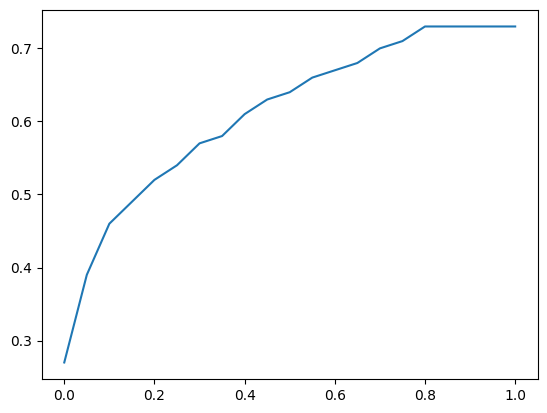

In [75]:
plt.plot(thresholds, scores)

### Confusion Table

In [76]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [77]:
predict_positive = (y_pred > 0.5)
predict_negative = (y_pred < 0.5)

In [78]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [79]:
tp

89

In [80]:
tn

813

In [81]:
fp

219

In [82]:
fn

288

In [83]:
confusion_matrix = np.array([[tp, fp], [fn, tn]])
confusion_matrix

array([[ 89, 219],
       [288, 813]])

In [84]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.06, 0.16],
       [0.2 , 0.58]])

### Precision & Recall

In [85]:
(tp + tn) / (tp + tn + fp + fn)

0.6401703335699077

In [86]:
p = tp / (tp + fp)
p

0.288961038961039

In [87]:
r = tp / (tp + fn)
r

0.23607427055702918

### ROC Curves

In [88]:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

(tpr, fpr)

(0.23607427055702918, 0.21220930232558138)

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

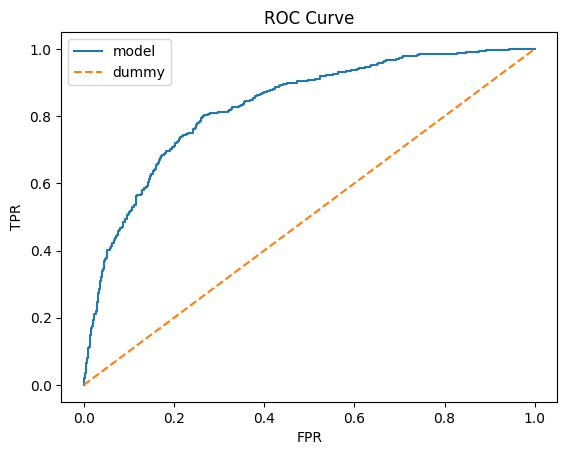

In [90]:
plt.plot(fpr, tpr, label = "model")
plt.plot([0,1], [0,1], label="dummy", linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()

In [91]:
roc_auc_score(y_test, y_pred)

0.8299396450309448

### Cross Validation

In [99]:
def train(df, y):
    data = df[categorical + numerical].to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    dv.fit(data)

    X = dv.transform(data)

    model = LogisticRegression(solver="liblinear")
    model.fit(X, y)

    return dv, model

def predict(df, dv, model):
    data = df[categorical + numerical].to_dict(orient="records")

    X = dv.transform(data)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred 

In [100]:
kfold = KFold(n_splits=10, shuffle=True, random_state=143)

In [101]:
aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    y_train = df_train.churn.values

    df_val = df_full_train.iloc[val_idx]
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    roc_auc = roc_auc_score(y_val, y_pred)
    aucs.append(roc_auc)

In [102]:
np.array(aucs).round(3)

array([0.846, 0.839, 0.836, 0.849, 0.839, 0.857, 0.848, 0.872, 0.858,
       0.838])

In [103]:
print("auc= %0.3f +- %0.3f" % (np.mean(aucs), np.std(aucs)))

auc= 0.848 +- 0.011


In [104]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [107]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f +- %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.829 +- 0.010
C=0.01, auc = 0.847 +- 0.009
C=0.1, auc = 0.848 +- 0.008
C=0.5, auc = 0.848 +- 0.008
C=1, auc = 0.848 +- 0.008
C=10, auc = 0.848 +- 0.008


In [111]:
y_train = df_full_train.churn.values
#y_test = df_test.churn.values

dv, model = train(df_full_train, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.832
